In [1]:
import tensorflow
import os

In [2]:
from tensorflow import keras

In [3]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
import keras

Using TensorFlow backend.


In [5]:
import cv2


In [6]:
import tensorflow as tf

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tqdm import tqdm

In [8]:
DATADIR ="C:/BIDHAN_SHARED/Spectrogram"

In [9]:
CATEGORIES = ["Airport", "Bus","Mall","Metro", "Metrostation", 
              "Park", "Pedestrain", "Square", 
              "StreetTraffic", "Tram"]

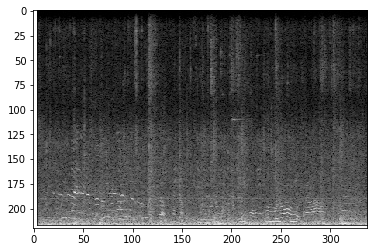

In [10]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to 10 categories
    for img in os.listdir(path):   # iterates through all the ten categories
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #

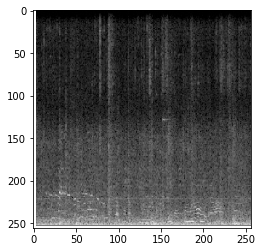

In [11]:
#IMG_SIZE1 = 300
IMG_SIZE1=256
IMG_SIZE2=256
new_array = cv2.resize(img_array, (IMG_SIZE1, IMG_SIZE2))
plt.imshow(new_array, cmap='gray')
plt.show()


In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE1, IMG_SIZE2))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))


In [13]:
create_training_data()

100%|███████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 700.91it/s]


In [14]:
import random

In [15]:
random.shuffle(training_data)

In [16]:
for sample in training_data[:20]:
    print(sample[1])

6
4
4
4
8
0
7
8
1
4
6
2
3
2
2
1
2
1
5
6


In [17]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)



X = np.array(X).reshape(-1, IMG_SIZE1, IMG_SIZE2, 1)

In [18]:
print(X[0].reshape(-1, IMG_SIZE1, IMG_SIZE2, 1))

[[[[255]
   [254]
   [255]
   ...
   [  2]
   [  0]
   [  0]]

  [[255]
   [255]
   [255]
   ...
   [  1]
   [  1]
   [  2]]

  [[255]
   [255]
   [255]
   ...
   [  0]
   [  1]
   [  1]]

  ...

  [[253]
   [254]
   [255]
   ...
   [122]
   [123]
   [119]]

  [[255]
   [254]
   [254]
   ...
   [253]
   [253]
   [255]]

  [[255]
   [254]
   [253]
   ...
   [255]
   [254]
   [255]]]]


In [19]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import Activation,LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.initializers import glorot_normal
from keras.utils import np_utils
#from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K

In [22]:
from keras.layers import Lambda

In [23]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [24]:
X=X/255.0

In [25]:
num_classes=10

In [26]:
X.shape[1:]

(256, 256, 1)

In [36]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
          
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))



model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu')) 
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu')) 
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))    

#model.add (LSTM(256))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))        
model.add(Activation('relu'))
        

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add((Dropout(0.5)))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, nesterov=True)

In [35]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 254, 254, 64)      640       
_________________________________________________________________
activation_23 (Activation)   (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
activation_24 (Activation)   (None, 252, 252, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 250, 250, 64)      36928     
_________________________________________________________________
activation_25 (Activation)   (None, 250, 250, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 125, 125, 64)     

In [31]:
model.fit(X, y, batch_size=32, epochs=65, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 5999 samples, validate on 1500 samples
Epoch 1/65
1728/5999 [=======>......................] - ETA: 45:12 - loss: 2.3026 - acc: 0.03 - ETA: 22:55 - loss: 2.3026 - acc: 0.07 - ETA: 15:30 - loss: 2.3026 - acc: 0.08 - ETA: 11:47 - loss: 2.3026 - acc: 0.07 - ETA: 9:33 - loss: 2.3026 - acc: 0.0750 - ETA: 8:03 - loss: 2.3027 - acc: 0.083 - ETA: 6:59 - loss: 2.3026 - acc: 0.089 - ETA: 6:12 - loss: 2.3026 - acc: 0.085 - ETA: 5:34 - loss: 2.3027 - acc: 0.083 - ETA: 5:04 - loss: 2.3027 - acc: 0.081 - ETA: 4:40 - loss: 2.3027 - acc: 0.079 - ETA: 4:19 - loss: 2.3027 - acc: 0.078 - ETA: 4:02 - loss: 2.3027 - acc: 0.076 - ETA: 3:47 - loss: 2.3026 - acc: 0.080 - ETA: 3:34 - loss: 2.3027 - acc: 0.075 - ETA: 3:22 - loss: 2.3027 - acc: 0.076 - ETA: 3:12 - loss: 2.3027 - acc: 0.079 - ETA: 3:03 - loss: 2.3027 - acc: 0.081 - ETA: 2:55 - loss: 2.3027 - acc: 0.082 - ETA: 2:48 - loss: 2.3026 - acc: 0.084 - ETA: 2:41 - loss: 2.3026 - acc: 0.084 - ETA: 2:

KeyboardInterrupt: 